# Probability and Statistics
- https://github.com/cs109/2015lab3
- https://gist.github.com/mattions/6113437/

In [203]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Simulate Coin Toss

In [10]:
def coinToss(N):
    return np.random.choice(['H', 'T'], size = N)

coinToss(10)

array(['H', 'H', 'T', 'T', 'H', 'T', 'H', 'T', 'H', 'T'], dtype='<U1')

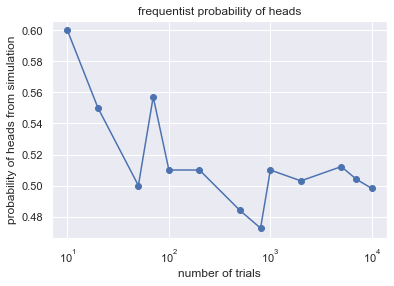

In [31]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]

prob_Head = [np.sum(coinToss(j) == 'H')/np.float(j) for j in trials]

plt.plot(trials, prob_Head, '-o')
plt.xscale("log")
plt.xlabel('number of trials')
plt.ylabel('probability of heads from simulation')
plt.title('frequentist probability of heads');
        


### Simple Election Model
- ```predictwise``` is a dataframe with the probability of each candidate winning each of the states.
- ```simulate_election``` generates 51 values in [0,1] from a uniform distribution and compares whether the value is greater or lesser than the probability of Obama winning that state. If greater, then that state's eletoral votes is awarded to Obama, else 0.
- ```result``` gives an array of total number of electoral votes by running the simulation 10,000 times. A histogram of this array is plotted.

In [78]:
predictwise = pd.read_csv('./data/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [114]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size = (51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1,1)) * model.Votes.values.reshape(-1,1)
    
    # calcualte the total number of electoral votes won by Obama
    return obama_votes.sum(axis = 0)

In [115]:
simulate_election(predictwise,2)

array([332, 332], dtype=int64)

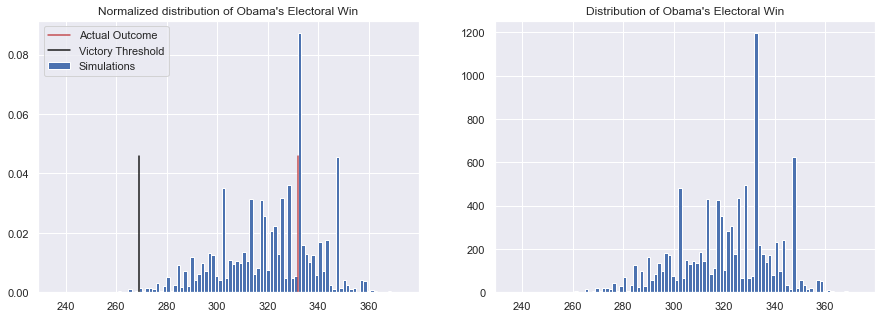

In [164]:
result = simulate_election(predictwise, 10000)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(result, bins = 100, density = True, label = 'Simulations')
plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
plt.title("Normalized distribution of Obama's Electoral Win")
plt.legend();

plt.subplot(122)
plt.hist(result, bins = 100, label = 'Simulations')
plt.title("Distribution of Obama's Electoral Win");

### Random Variables
**Sample space** of an experiment is a set of all possible outcomes. For example, in a coin toss experiment the sample space is [H,T].

**Random variable** is a mapping of sample space to numerical values. Say X is the outcome heads from the experiment, random variable is the number of heads observed. So $X = 0, 1.... and...P(X=0) = P(X=1) = 1/2$

### Bernoulli Distribution
**Bernoulli distribution** represents the distribution of coin flips. Let X be the coin flip with X=1 meaning heads, and X=0 meaning tails. The probability distribution function **(pdf)** is defined as:

\begin{align}
&P(X = 1) = p \\
&P(X = 0) = 1 - p
\end{align}


In [189]:
from scipy.stats import bernoulli, poisson, binom
bernoulli.rvs(0.1, size=100)  # prob of H = 0.1, means most of the time you get tails (0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

### Binomial Distribution
A distribution of successes in a sequence of $n$ independent yes/no experiments, each of which yields a success with probability $p$. The distribution is defined as:

$$f(k;n,p) = P(X=k) =  {{n}\choose{k}} p^k(1-p)^{(n-k)}$$

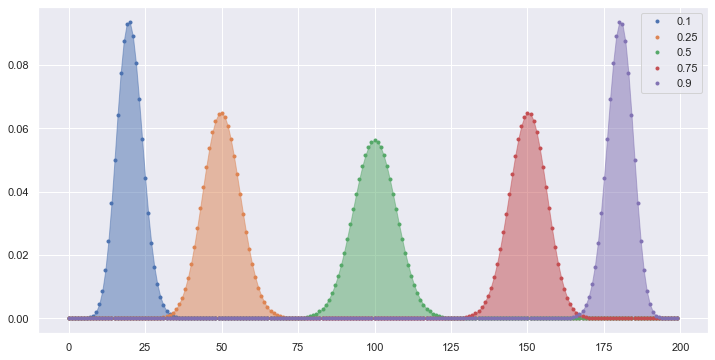

In [231]:
plt.figure(figsize = (12,6))
colors=sns.color_palette()

k = np.arange(0,200)

for p, color in zip([0.1, 0.25, 0.5, 0.75, 0.9], colors):
    rv = binom(200, p)  # n,p
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)

plt.legend();

### The various ways to get random numbers
1. ```np.random.choice``` chooses items randomly from an array, with or without replacement
2. ```np.random.random``` gives us uniform randoms on [0.0,1.0]
3. ```np.random.randint``` gives us random integers in some range
4. ```np.random.randn``` gives us random samples from a Normal distribution, which we talk about later.
5. ```scipy.stats.distrib``` gives us stuff from a distribution. Here distrib could be ```binom``` for example, as above. ```distrib.pdf``` or ```distrib.pmf``` give us the density or mass function, while cdf gives us the cumulaive distribution function. Just using distrib as a function with its params creates a random variable generating object, from which random variables can be generated in the form ```distrib(params).rvs(size)```.

###  Poisson Distribution
Distribution of number of events that occur where there are a large number of independent rare events. Distribution is:

$$P(Z=k) = \frac{\lambda e^{-\lambda}} {k!}, k = 0,1,2,...$$

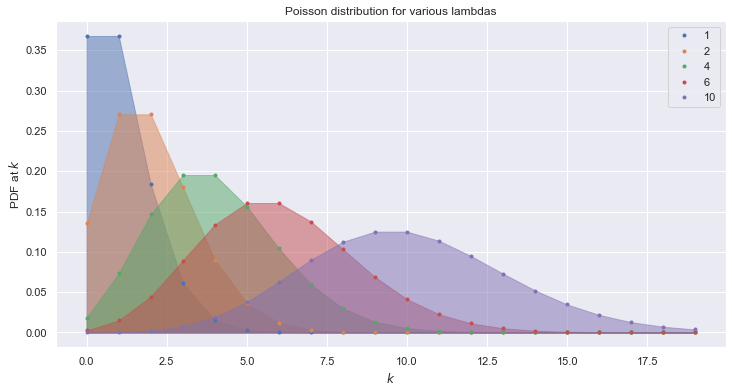

In [251]:
plt.figure(figsize = (12,6))
k = np.arange(0,20)

for i, lambdas in enumerate([1, 2, 4, 6, 10]):
    plt.plot(k, poisson.pmf(k, lambdas), '.', lw=2, color = colors[i], label = lambdas)
    plt.fill_between(k, poisson.pmf(k, lambdas), color = colors[i], alpha=0.5)

plt.title("Poisson distribution for various lambdas")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")
    
plt.legend();

###  Law of Large Numbers
To show how by increasing the number of coin flips, the average number of heads approaches 0.5 with a fair coin (p = 0.5).

$$S_n = \frac{1}{n} \sum_{i=0}^{n}x_i $$ 

$$S_n \rightarrow \mu \ {as} \ n \rightarrow \infty $$




In [268]:
# Returns an array of N with 1s and 0s for heads and tails (p=0.5)
def coinThrow(N):
    return bernoulli.rvs(0.5, size = N)

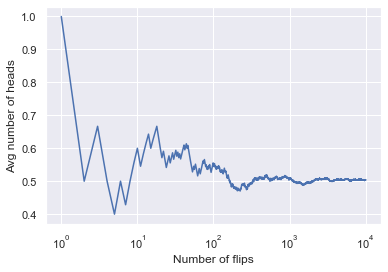

In [296]:
N = 10000
randomflips = coinThrow(N)
means = np.zeros(N)
flips = np.arange(1,N+1,1)

for i in flips:
    means[i-1] = np.mean(randomflips[:i])

plt.plot(flips, means)
plt.xscale("log")
plt.xlabel("Number of flips")
plt.ylabel("Avg number of heads");

### Samples from a population of coin flips
- Lets flip a coin $N$ times and repeat this $M$ times
- Result of each flip is an observation, a set of $N$ observations is called a sample, and we'll generate $M$ samples. $N$ samples have been taken from a population of $n$ such that $n >> N$
- Lets take a sample size of 20 ($N$) and repeat this 10 times ($M$).

In [305]:
def makeThrows(sample_number, sample_size):
    means = np.zeros(sample_number)
    
    for i in range(sample_number):
        means[i] = np.mean(coinThrow(sample_size))
    
    return means

In [330]:
# Gives the mean of number heads in 1,2,3,4 throws, repeated 20 times
print(makeThrows(20, 1), "\n")
print(makeThrows(20, 2), "\n")
print(makeThrows(20, 3), "\n")
print(makeThrows(20, 4), "\n")

[0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.] 

[0.5 0.  0.  0.5 0.  1.  0.  0.5 0.5 0.5 1.  0.  0.  0.5 1.  0.  0.  0.5
 1.  0. ] 

[0.33333333 0.         0.66666667 0.         0.66666667 1.
 0.66666667 0.66666667 0.66666667 1.         0.33333333 0.33333333
 1.         0.         0.33333333 0.66666667 1.         0.33333333
 0.33333333 0.33333333] 

[0.5  0.75 0.25 0.5  0.75 0.5  0.25 0.5  0.5  0.5  0.75 0.25 0.5  0.75
 0.5  0.25 0.25 0.75 0.75 0.5 ] 



- Lets now do 200 replications of [1,2,3,....1000] flips. The 200 means for each of the flip counts in stored in ```sample_means```. 
- So N=1 means flip coin 200 times, N=2 means flip coin twice 200 times, N=3 means flip coin thrice 200 times.....

In [317]:
sample_number = 200
sample_size = np.arange(1,1001,1)

# Has 200 means for each of flip counts from 1 to 1000
sample_means = [makeThrows(sample_number, i) for i in sample_size]


In [332]:
# Calculate the mean for the 200 means for each of the flip counts
mean_sample_means = [np.mean(i) for i in sample_means]

- Plot of the mean of sample means
- Take 400 flips for example. We flipped the coin 400 times and got a mean. We did this for 200 times, so we got 200 means for number of heads
- We then took the mean of these 200 means and plot that value.
- As N gets larger, the mean of the sample means converges to the population mean


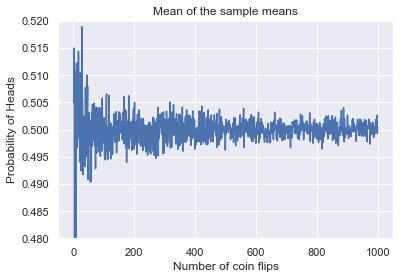

In [336]:
plt.plot(sample_size, mean_sample_means)
plt.xlabel("Number of coin flips")
plt.ylabel("Probability of Heads")
plt.title("Mean of the sample means")
plt.ylim([0.480,0.520]);

###  Sampling Distribution

###  Sampling distribution as function of sample size
The distribution is much tighter for larger sample size (1000 flips) compared to smaller sample sizes (100 and 10 flips).

In [341]:
sample_means_at_size_10=sample_means[9]     # 10 coins tossed 200 times
sample_means_at_size_100=sample_means[99]   # 100 coins tossed 200 times
sample_means_at_size_1000=sample_means[999] # 1000 coins tossed 200 times

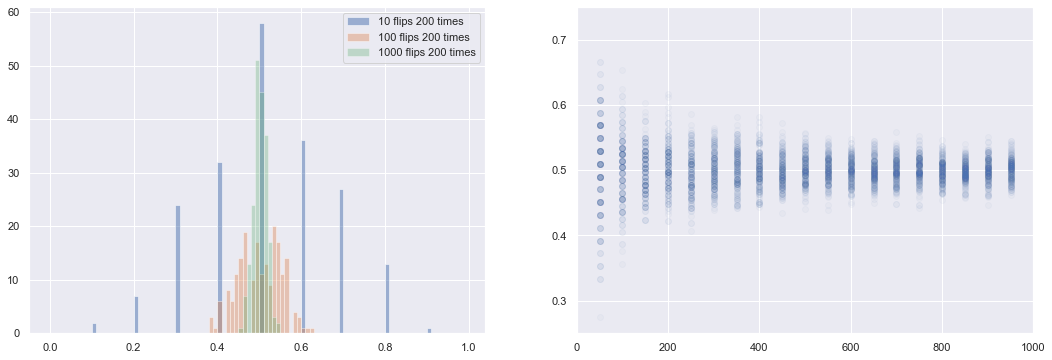

In [370]:
plt.figure(figsize = (18,6))

plt.subplot(121)
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5, label = "10 flips 200 times");
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4, label = "100 flips 200 times");
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3, label = "1000 flips 200 times");
plt.legend();

plt.subplot(122)
for i in sample_size:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.03, color = 'b');
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

### Mean and Variance of Sample Means
For very large N:

$$E(\bar{x}) = \mu$$

$$Var(\bar{x}) = \frac {\sigma^2}{N}$$

In [374]:
std_sample_means = [np.std(i) for i in sample_means]

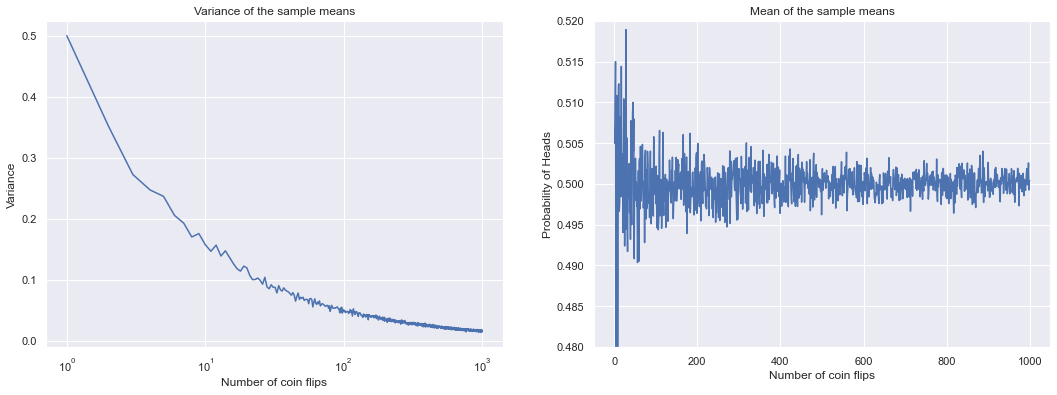

In [388]:
plt.figure(figsize = (18,6))

plt.subplot(121)
plt.plot(sample_size, std_sample_means)
plt.xscale("log")
plt.xlabel("Number of coin flips")
plt.ylabel("Variance")
plt.title("Variance of the sample means")

plt.subplot(122)
plt.plot(sample_size, mean_sample_means)
plt.xlabel("Number of coin flips")
plt.ylabel("Probability of Heads")
plt.title("Mean of the sample means")
plt.ylim([0.480,0.520]);

In [381]:
# Can see that variance with a sample of 1000 coin flips is almost 0.
std_sample_means[999]

0.016133845635805503

###  Gaussian Distribution
Distribution of sample means is given by:

$$N(x, \mu, \sigma) = \frac {1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=\sigma^2$.

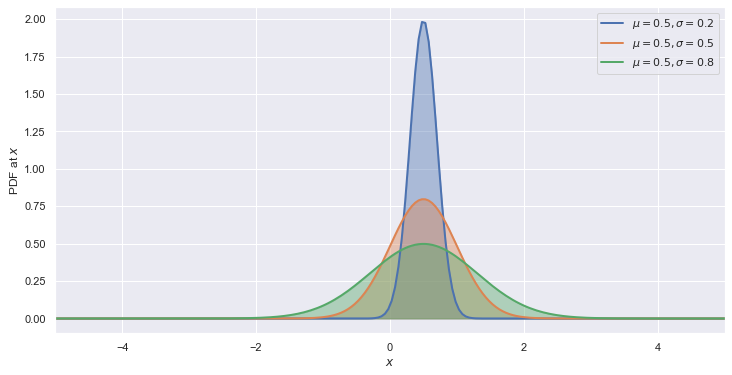

In [386]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$");

### Central Limit Theorem


Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them: 

$$S_n = \frac {1}{n} \sum_{i=0}^{n}x_i $$

 
 
converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:

$$S_n \sim N(\mu, \frac {\sigma^2}{n}) ...as... n \to \infty$$

As a rule of thumb, the CLT starts holding at $N \sim 30$.

### Distribution of variance